<a href="https://colab.research.google.com/github/HYUNSOOLEE-6839/colab-Deep-Learning/blob/main/%EB%82%98%EB%B9%84%EC%95%BC_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 기본 LSTM 모델

In [ ]:
# 0. 사용할 패키지 불러오기
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [ ]:
# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [ ]:
 # 시퀀스 데이터 정의하고 데이터셋  생성

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [ ]:
# 2. 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

(50, 5)


In [ ]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,:-1]
y_train = dataset[:,-1]

max_idx_value = 13

In [ ]:
# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)
x_train.shape

(50, 4)

In [ ]:
x_train = np.reshape(x_train, (50, 4, 1))

In [ ]:
# 라벨값에 대한 one-hot 인코딩 수행
y_train = to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  12


In [ ]:
# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, input_shape = (4,1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_2 (Dense)              (None, 12)                1548      
Total params: 68,108
Trainable params: 68,108
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 5. 모델 학습시키기
history = model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2)

Epoch 1/2000
5/5 - 2s - loss: 2.4572 - accuracy: 0.2400
Epoch 2/2000
5/5 - 0s - loss: 2.4078 - accuracy: 0.3400
Epoch 3/2000
5/5 - 0s - loss: 2.3515 - accuracy: 0.3400
Epoch 4/2000
5/5 - 0s - loss: 2.2904 - accuracy: 0.3400
Epoch 5/2000
5/5 - 0s - loss: 2.2063 - accuracy: 0.3400
Epoch 6/2000
5/5 - 0s - loss: 2.1252 - accuracy: 0.3400
Epoch 7/2000
5/5 - 0s - loss: 2.0365 - accuracy: 0.3400
Epoch 8/2000
5/5 - 0s - loss: 1.9947 - accuracy: 0.3400
Epoch 9/2000
5/5 - 0s - loss: 1.9758 - accuracy: 0.3400
Epoch 10/2000
5/5 - 0s - loss: 1.9625 - accuracy: 0.3400
Epoch 11/2000
5/5 - 0s - loss: 1.9371 - accuracy: 0.3400
Epoch 12/2000
5/5 - 0s - loss: 1.9328 - accuracy: 0.3400
Epoch 13/2000
5/5 - 0s - loss: 1.9248 - accuracy: 0.3400
Epoch 14/2000
5/5 - 0s - loss: 1.9177 - accuracy: 0.3400
Epoch 15/2000
5/5 - 0s - loss: 1.9144 - accuracy: 0.3400
Epoch 16/2000
5/5 - 0s - loss: 1.9114 - accuracy: 0.3400
Epoch 17/2000
5/5 - 0s - loss: 1.9069 - accuracy: 0.3400
Epoch 18/2000
5/5 - 0s - loss: 1.9029 - 

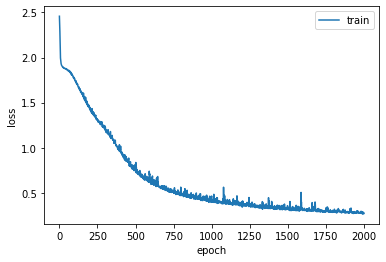

In [37]:
# 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 7ms/step - loss: 0.2647 - accuracy: 0.8800
accuracy: 88.00%


In [ ]:
# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [38]:
# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8']
